# Importando Bibliotecas

In [8]:
import numpy as np
import pandas as pd
import scipy
from scipy.spatial import distance_matrix
from scipy.cluster import hierarchy
import seaborn as sns
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import datasets
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans

# Validação por Inspeção Visual

In [9]:
dataset = pd.read_csv("data\segmentation data.csv")
dataset

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [10]:
# deletando coluna ID, para nosso casdo é irrelevante.
dataset.drop(['ID'], inplace=True, axis=1)

<Axes: xlabel='Age', ylabel='Income'>

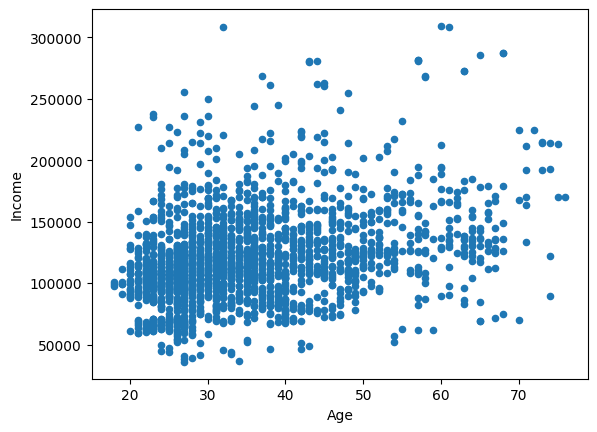

In [11]:
dataset.plot(kind='scatter',x='Age',y='Income')

In [12]:
def calcular_matriz_dissimilaridade(dados):
  M = np.zeros((len(dados),len(dados)))
  for i,row_i in dados.iterrows(): # para cada objeto i
      features_i = np.array(row_i) # atributos do objeto i
      for j,row_j in dados.iterrows(): # para cada objeto j
          features_j = np.array(row_j) # atributos do objeto j
          # calcula distância euclidiana
          euc = scipy.spatial.distance.euclidean(features_i, features_j)
          # armazena na posição M[i,j]
          M[i,j] = euc
  return M

In [13]:
M = calcular_matriz_dissimilaridade(dataset)
M

array([[    0.        , 26103.03884608, 35460.00465313, ...,
        38270.0170499 , 26702.03477265, 56254.01575888],
       [26103.03884608,     0.        , 61563.00597762, ...,
        64373.00069128, 52805.00008522, 82357.00010321],
       [35460.00465313, 61563.00597762,     0.        , ...,
         2810.05782859,  8758.03579577, 20794.01387419],
       ...,
       [38270.0170499 , 64373.00069128,  2810.05782859, ...,
            0.        , 11568.00224758, 17984.00100089],
       [26702.03477265, 52805.00008522,  8758.03579577, ...,
        11568.00224758,     0.        , 29552.00006768],
       [56254.01575888, 82357.00010321, 20794.01387419, ...,
        17984.00100089, 29552.00006768,     0.        ]])

C:\Users\ricar\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\ricar\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
C:\Users\ricar\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\ricar\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


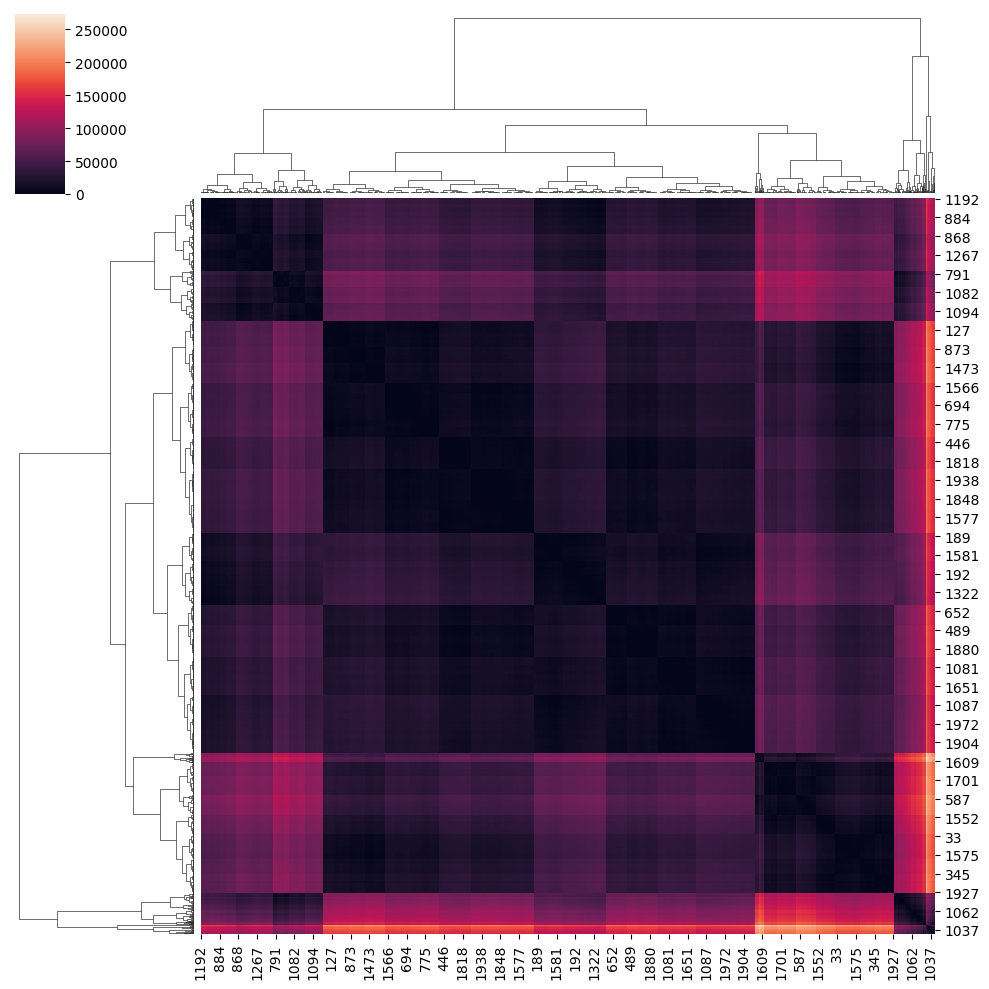

In [14]:
sns.clustermap(M)  # average-link com distância euclidiana

# Índices de Validade Interna
## Erro Quadrático (k-Means)

In [15]:
L = []
for k in range(2,51): # variando de 2 até 51
  kmeans = KMeans(n_clusters=k,n_init=10,init='random',max_iter=300)
  kmeans.fit(dataset) # agrupando
  print('k=',k,'E=',kmeans.inertia_)
  L.append((k,kmeans.inertia_))

k= 2 E= 1214580027362.1716
k= 3 E= 673028998342.7737
k= 4 E= 377110110166.3978
k= 5 E= 248986947113.3495
k= 6 E= 177007763597.92017
k= 7 E= 129551828068.79779
k= 8 E= 96380594474.83035
k= 9 E= 79661595478.02638
k= 10 E= 64505865872.3288
k= 11 E= 53963029979.98697
k= 12 E= 44768295319.56773
k= 13 E= 38372687290.124344
k= 14 E= 33890476194.2184
k= 15 E= 30769040394.935944
k= 16 E= 28708404504.901634
k= 17 E= 26342225332.91482
k= 18 E= 24611308049.590775
k= 19 E= 23406790394.67607
k= 20 E= 19678282560.878178
k= 21 E= 17274613233.93944
k= 22 E= 16904467800.912432
k= 23 E= 15379735271.854174
k= 24 E= 15093191910.423672
k= 25 E= 18332514746.63246
k= 26 E= 14923098072.53757
k= 27 E= 15366280156.231573
k= 28 E= 16708858379.560534
k= 29 E= 16257252103.575935
k= 30 E= 12034096258.825596
k= 31 E= 16108131188.100878
k= 32 E= 12137792761.403336
k= 33 E= 10939628045.82319
k= 34 E= 9365918355.501572
k= 35 E= 10107815357.41304
k= 36 E= 11125352730.799702
k= 37 E= 11047191349.342442
k= 38 E= 8266479057

In [16]:
df_kmeans_e = pd.DataFrame(L)
df_kmeans_e.columns = ['k','E']
df_kmeans_e

,k,E
0,2,1.214580e+12
1,3,6.730290e+11
2,4,3.771101e+11
3,5,2.489869e+11
4,6,1.770078e+11
5,7,1.295518e+11
6,8,9.638059e+10
7,9,7.966160e+10
8,10,6.450587e+10
9,11,5.396303e+10


<Axes: xlabel='k'>

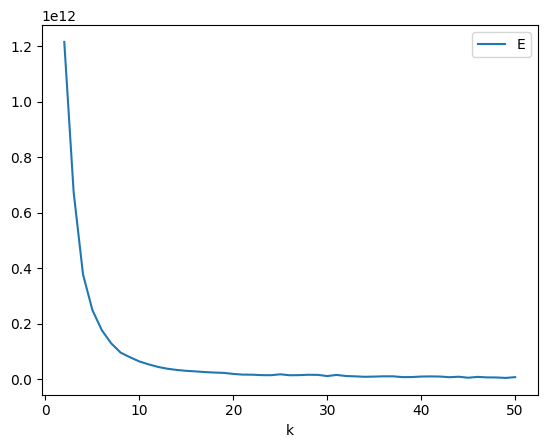

In [17]:
df_kmeans_e.plot(kind='line',x='k',y='E')

## Correlação Cofenética

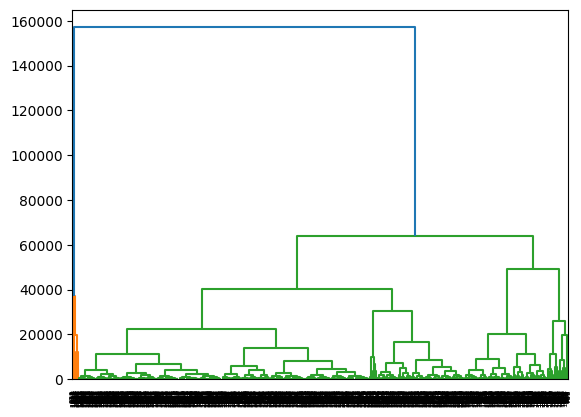

In [18]:
M = pdist(dataset) # calcula matriz de dissimilaridade
Z = hierarchy.linkage(M, 'average') #  'average' calcula a distância entre clusters usando a média das distâncias entre todos os pares de pontos nos dois clusters
dendrogram = hierarchy.dendrogram(Z)

In [19]:
# Calculando a matriz cofenética.
result = scipy.cluster.hierarchy.cophenet(Z,M)
print('Correlacao cofenetica = ',result[0]) 

Correlacao cofenetica =  0.7953215398743881


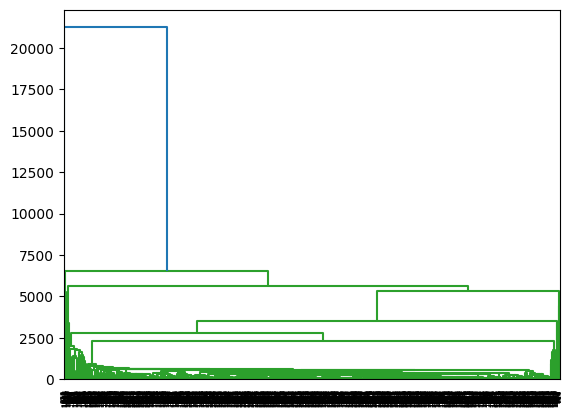

In [20]:
M = pdist(dataset) # calcula matriz de dissimilaridade
Z = hierarchy.linkage(M, 'single') # 'single' - Usa o mínimo das distâncias entre objetos.
dendrogram = hierarchy.dendrogram(Z)

In [21]:
# Calculando a matriz cofenética.
result = scipy.cluster.hierarchy.cophenet(Z,M)
print('Correlacao cofenetica = ',result[0])

Correlacao cofenetica =  0.6677901242930427


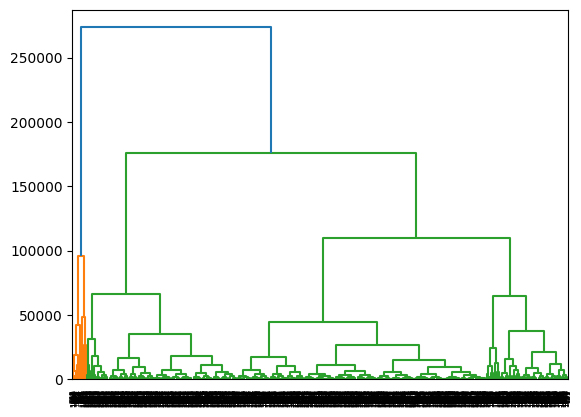

In [22]:
M = pdist(dataset) # calcula matriz de dissimilaridade
Z = hierarchy.linkage(M, 'complete') # 'complete' - Usa o máximo das distâncias entre objetos.
dendrogram = hierarchy.dendrogram(Z)

In [23]:
# Calculando a matriz cofenética.
result = scipy.cluster.hierarchy.cophenet(Z,M)
print('Correlacao cofenetica = ',result[0])

Correlacao cofenetica =  0.699178418172583


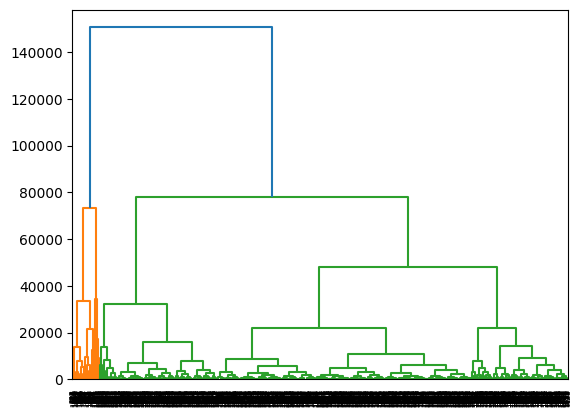

In [24]:
M = pdist(dataset) # calcula matriz de dissimilaridade
Z = hierarchy.linkage(M, 'weighted') # 'weighted' - Usa a média ponderada das distâncias entre clusters.
dendrogram = hierarchy.dendrogram(Z)

In [25]:
# Calculando a matriz cofenética.
result = scipy.cluster.hierarchy.cophenet(Z,M)
print('Correlacao cofenetica = ',result[0])

Correlacao cofenetica =  0.775770763824887


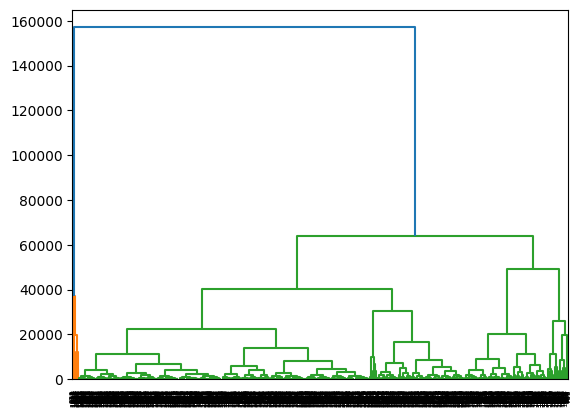

In [26]:
M = pdist(dataset) # calcula matriz de dissimilaridade
Z = hierarchy.linkage(M, 'centroid') # 'centroid' - Usa a distância euclidiana entre os centróides do cluster.
dendrogram = hierarchy.dendrogram(Z)

In [27]:
# Calculando a matriz cofenética.
result = scipy.cluster.hierarchy.cophenet(Z,M)
print('Correlacao cofenetica = ',result[0])

Correlacao cofenetica =  0.7953215397550302


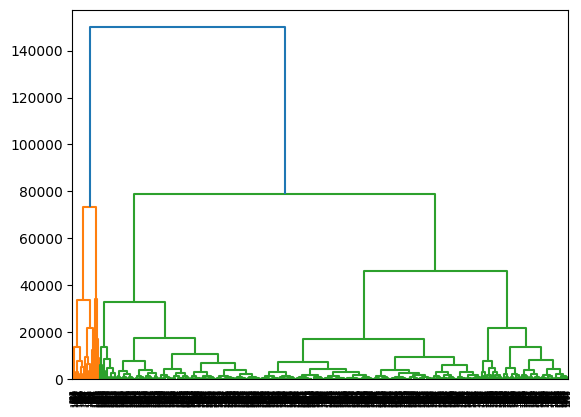

In [28]:
M = pdist(dataset) # calcula matriz de dissimilaridade
Z = hierarchy.linkage(M, 'median') # 'median' - Usa a mediana das distâncias entre objetos.
dendrogram = hierarchy.dendrogram(Z)

In [29]:
# Calculando a matriz cofenética.
result = scipy.cluster.hierarchy.cophenet(Z,M)
print('Correlacao cofenetica = ',result[0])

Correlacao cofenetica =  0.7571049353290695


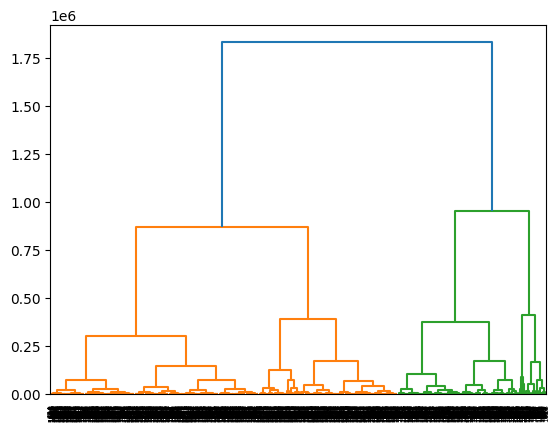

In [30]:
M = pdist(dataset) # calcula matriz de dissimilaridade
Z = hierarchy.linkage(M, 'ward') # 'ward' - Usa o método de ligação de Ward para minimizar a Soma dos Quadrados entre clusters
dendrogram = hierarchy.dendrogram(Z)

In [31]:
# Calculando a matriz cofenética.
result = scipy.cluster.hierarchy.cophenet(Z,M)
print('Correlacao cofenetica = ',result[0])

Correlacao cofenetica =  0.6159410597273277


# Índice de Validade Relativa (Silhueta)

In [32]:
kmeans = KMeans(n_clusters=3,n_init=10,init='random',max_iter=300)
kmeans.fit(dataset) # agrupando

KMeans(init='random', n_clusters=3, n_init=10)

In [33]:
dataset['cluster'] = kmeans.labels_

In [34]:
dataset['silhueta'] = silhouette_samples(dataset, kmeans.labels_)
dataset

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,silhueta
0,0,0,67,2,124670,1,2,0,0.637425
1,1,1,22,1,150773,1,2,0,0.562103
2,0,0,49,1,89210,0,0,1,0.675356
3,0,0,45,1,171565,1,1,2,0.286878
4,0,0,53,1,149031,1,1,0,0.602296
...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,0,0.615535
1996,1,1,27,1,117744,1,0,0,0.433860
1997,0,0,31,0,86400,0,0,1,0.679375
1998,1,1,24,1,97968,0,0,1,0.602609


In [35]:
# calculando o valor de silhueta para todo o agrupamento
dataset.silhueta.mean()

0.5121742281639424